# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random

N = 500
d = 10
ads_selected = []
reward_1 = [0] * d
reward_0 = [0] * d
total_reward = 0

for n in range(0,N):
  ad = 0
  max_random = 0

  for i in range(0,d):
    random_draw = random.betavariate( reward_1[i] + 1, reward_0[i] + 1)
    if random_draw > max_random:
      max_random = random_draw
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n,ad]

  if(reward == 1):
    reward_1[ad] += 1
  else:
    reward_0[ad] += 1

  total_reward += reward

## Visualising the results - Histogram

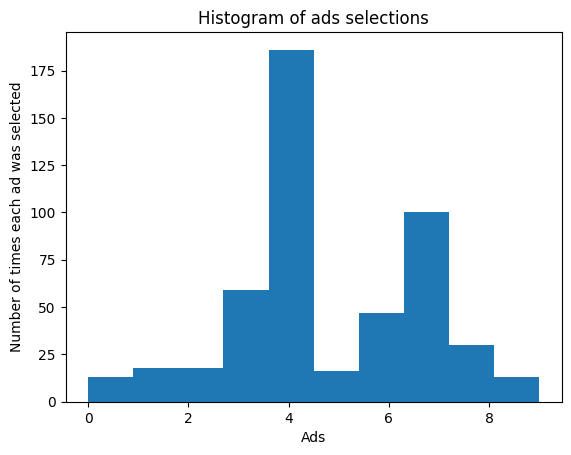

In [4]:
plt.hist(x=ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()